In [ ]:
%pip install requests beautifulsoup4 pandas matplotlib seaborn



In [133]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

from google.colab import files

In [101]:
# Data fetched

url = "https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table",{"class": "wikitable"})

df_unicorns = pd.read_html(StringIO(str(tables[0])))[0]
df_unicorns.head()

,# Unicorns,Total valuation (US$ billions),Date,Reported by
0,39,NaN,Late October/early November 2013,TechCrunch[8]
1,82,NaN,Late January 2015,"Forbes, CB Insights[9]"
2,229,1300.0,January 2016,VentureBeat[10]
3,208,761.0,December 2016,TechCrunch[5]
4,224,771.9,April 2017,TechCrunch


In [102]:
url = "https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"class": "wikitable"})

df_gdp = pd.read_html(StringIO(str(table)))[0]

df_gdp.head()


,State/Union Territory[a],2022-23,2023-24,Change
0,Maharashtra *,36459,40443,10.93%
1,Tamil Nadu *,23934,27216,13.71%
2,Uttar Pradesh *,22580,25479,12.84%
3,Karnataka *,22700,25007,10.16%
4,Gujarat *,22034,24258,10.09%


In [103]:
url = "https://en.wikipedia.org/wiki/Literacy_in_India"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table", {"class": "wikitable"})

df_literacy = pd.read_html(StringIO(str(tables[0])))[0]

df_literacy.head()


,No,State,Literacy Rate in Percentage
0,1,Kerala,93.91%
1,2,Delhi,88.7%
2,3,Uttarakhand,87.6%
3,4,Himachal Pradesh,86.6%
4,5,Assam,85.9%


In [104]:
url = "https://en.wikipedia.org/wiki/Internet_in_India"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table", {"class": "wikitable"})

df_internet = pd.read_html(StringIO(str(tables[1])))[0]

df_internet.head()


,Operator,Subscribers[24] (million),Ownership
0,Jio,470.19,Jio Platforms
1,Airtel,264.76,Bharti Airtel
2,Vi,127.29,Vodafone Idea Limited
3,BSNL,25.12,Government of India
4,ACT,2.23,Atria Convergence


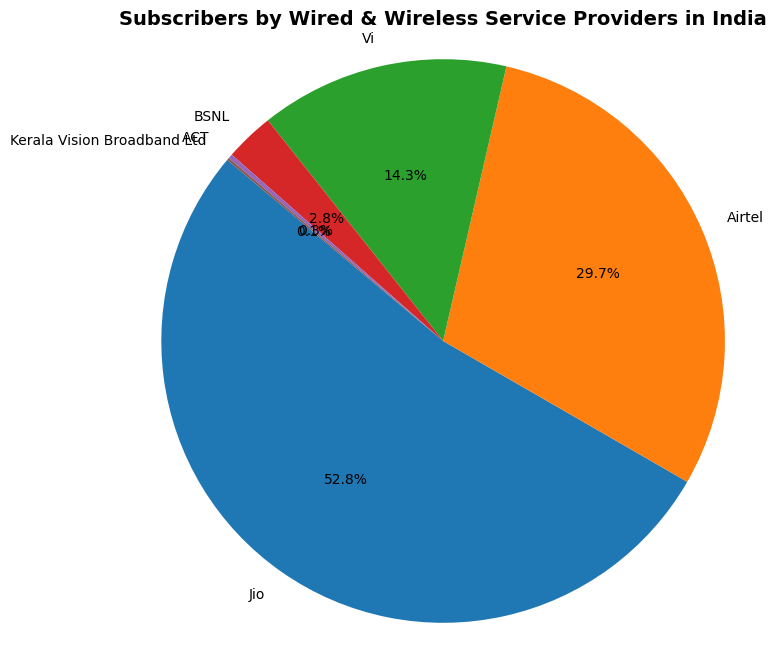

In [140]:
df_internet['Subscribers[24] (million)'] = df_internet['Subscribers[24] (million)'].astype(str).str.replace(r'\[.*\]', '', regex=True)
df_internet['Subscribers[24] (million)'] = pd.to_numeric(df_internet['Subscribers[24] (million)'])

plt.figure(figsize=(8,8))
plt.pie(df_internet['Subscribers[24] (million)'], labels=df_internet['Operator'], autopct='%1.1f%%', startangle=140 )
plt.title("Subscribers by Wired & Wireless Service Providers in India",fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


In [109]:
# Data cleaning

def clean_state_names(df, column):
    df[column] = df[column].astype(str)
    df[column] = df[column].str.strip().str.replace(r'\[.*?\]', '', regex=True).str.replace(r'\*', '', regex=True)
    return df


# Rename the common column
df_gdp.rename(columns={df_gdp.columns[0]: 'State'}, inplace=True)
df_literacy.rename(columns={df_literacy.columns[1]: 'State'}, inplace=True)

df_gdp = clean_state_names(df_gdp, 'State')
df_literacy = clean_state_names(df_literacy, 'State')


df_gdp.head()

,State,2022-23,2023-24,Change
0,Maharashtra,36459,40443,10.93%
1,Tamil Nadu,23934,27216,13.71%
2,Uttar Pradesh,22580,25479,12.84%
3,Karnataka,22700,25007,10.16%
4,Gujarat,22034,24258,10.09%


In [108]:
df_literacy.head()

,No,State,Literacy Rate in Percentage
0,1,Kerala,93.91%
1,2,Delhi,88.7%
2,3,Uttarakhand,87.6%
3,4,Himachal Pradesh,86.6%
4,5,Assam,85.9%


In [110]:
# Merge the data

merged = pd.merge(df_gdp, df_literacy, left_on='State', right_on='State' )
merged.head()

,State,2022-23,2023-24,Change,No,Literacy Rate in Percentage
0,Maharashtra,36459,40443,10.93%,6,84.8%
1,Tamil Nadu,23934,27216,13.71%,8,82.9%
2,Gujarat,22034,24258,10.09%,9,82.4%
3,West Bengal,15318,17009,11.04%,10,82.2%
4,Kerala,10236,11461,11.97%,1,93.91%


In [111]:
merged.rename(columns={
    '2022-23': 'GDP_2022',
    '2023-24': 'GDP_2023',
    'Change': 'GDP_Change',
    'Literacy Rate in Percentage': 'Literacy_Rate'
}, inplace=True)

merged.head()

,State,GDP_2022,GDP_2023,GDP_Change,No,Literacy_Rate
0,Maharashtra,36459,40443,10.93%,6,84.8%
1,Tamil Nadu,23934,27216,13.71%,8,82.9%
2,Gujarat,22034,24258,10.09%,9,82.4%
3,West Bengal,15318,17009,11.04%,10,82.2%
4,Kerala,10236,11461,11.97%,1,93.91%


In [112]:
# Drop the unnecessary column

df_merged= merged.drop(columns=['No'])
df_merged.head()

,State,GDP_2022,GDP_2023,GDP_Change,Literacy_Rate
0,Maharashtra,36459,40443,10.93%,84.8%
1,Tamil Nadu,23934,27216,13.71%,82.9%
2,Gujarat,22034,24258,10.09%,82.4%
3,West Bengal,15318,17009,11.04%,82.2%
4,Kerala,10236,11461,11.97%,93.91%


In [113]:
row_count = len(df_merged)
print("Row Count", {row_count})

Row Count {10}


In [123]:
df_merged['GDP_2023'] = pd.to_numeric(df_merged['GDP_2023'], errors='coerce')
df_merged['GDP_2022'] = pd.to_numeric(df_merged['GDP_2022'], errors='coerce')

# Remove the % sign and convert to float
df_merged['Literacy_Rate'] = df_merged['Literacy_Rate'].astype(str).str.replace('%', '').str.strip()
df_merged['Literacy_Rate'] = pd.to_numeric(df_merged['Literacy_Rate'], errors='coerce')
df_merged['GDP_Change'] = df_merged['GDP_Change'].astype(str).str.replace('%', '').str.strip()
df_merged['GDP_Change'] = pd.to_numeric(df_merged['GDP_Change'], errors='coerce')


print(df_merged["GDP_2023"].dtypes)
print(df_merged["GDP_2022"].dtypes)
print(df_merged["GDP_Change"].dtypes)
print(df_merged["Literacy_Rate"].dtypes)

int64
int64
float64
float64


In [124]:
print(df_merged)

              State  GDP_2022  GDP_2023  GDP_Change  Literacy_Rate
0       Maharashtra     36459     40443       10.93          84.80
1        Tamil Nadu     23934     27216       13.71          82.90
2           Gujarat     22034     24258       10.09          82.40
3       West Bengal     15318     17009       11.04          82.20
4            Kerala     10236     11461       11.97          93.91
5             Delhi     10147     11077        9.17          88.70
6            Punjab      6813      7449        9.34          83.70
7             Assam      4788      5702       19.10          85.90
8       Uttarakhand      3038      3462       13.97          87.60
9  Himachal Pradesh      1917      2074        8.19          86.60


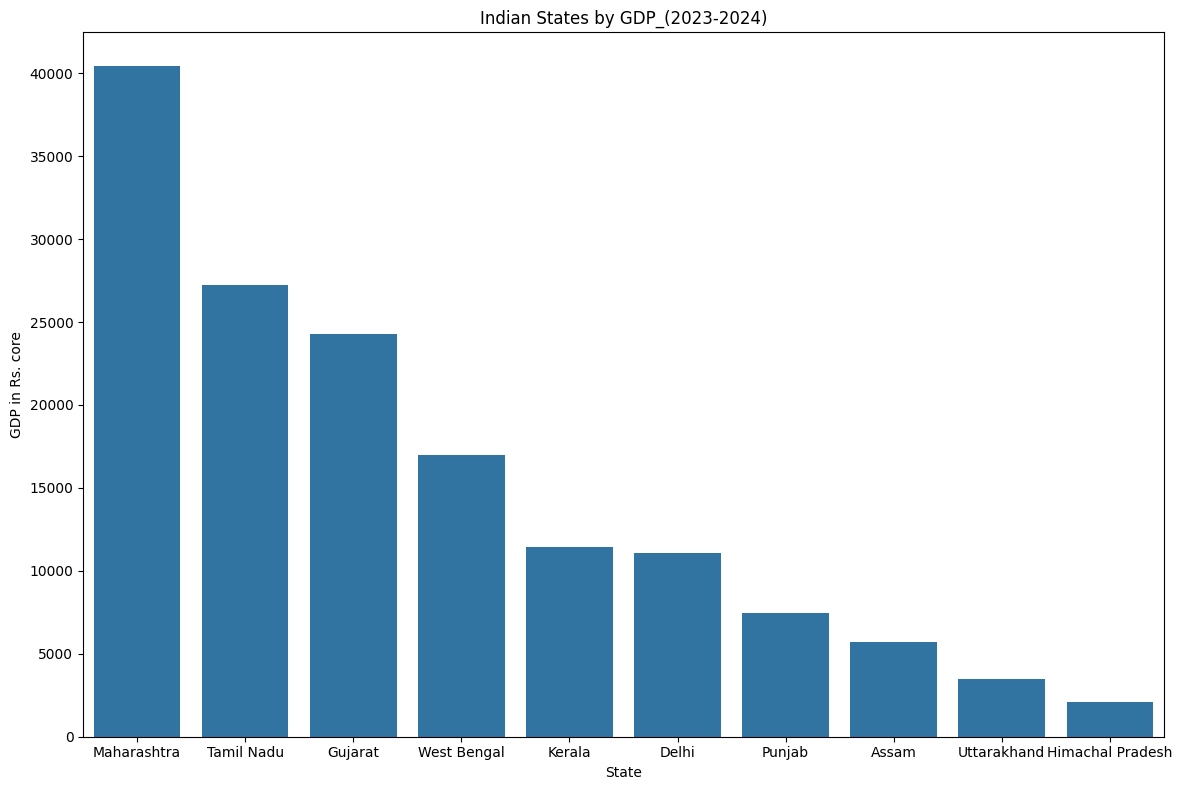

In [125]:
# States by GDP

top_gdp= df_merged.sort_values(by='GDP_2023', ascending=False)


plt.figure(figsize=(12,8))
sns.barplot(data=top_gdp, x='State', y='GDP_2023')
plt.title('Indian States by GDP_(2023-2024)')
plt.ylabel('GDP in Rs. core')
plt.xlabel('State')
plt.tight_layout()
plt.show()

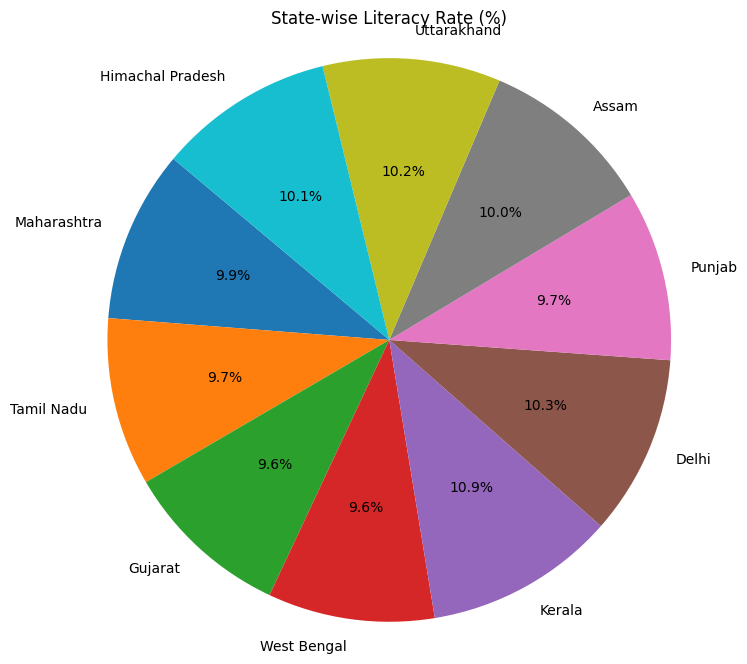

In [126]:
# States by Literacy Rate

plt.figure(figsize=(8,8))
plt.pie(df_merged['Literacy_Rate'], labels=df_merged['State'], autopct='%1.1f%%', startangle=140)
plt.title('State-wise Literacy Rate (%)')
plt.axis('equal')
plt.show()

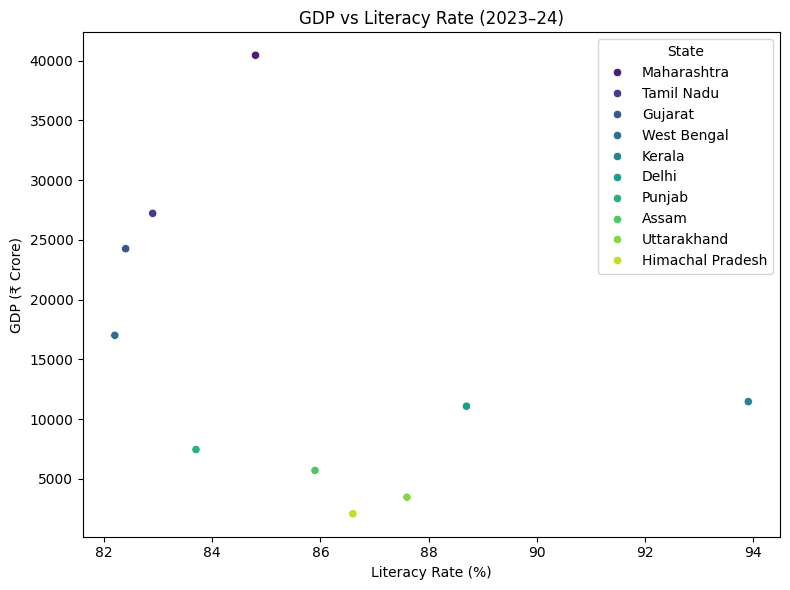

In [127]:
#GDP vS Literacy Rate

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='Literacy_Rate', y='GDP_2023', hue='State', palette='viridis')
plt.title('GDP vs Literacy Rate (2023–24)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('GDP (₹ Crore)')
plt.tight_layout()
plt.show()


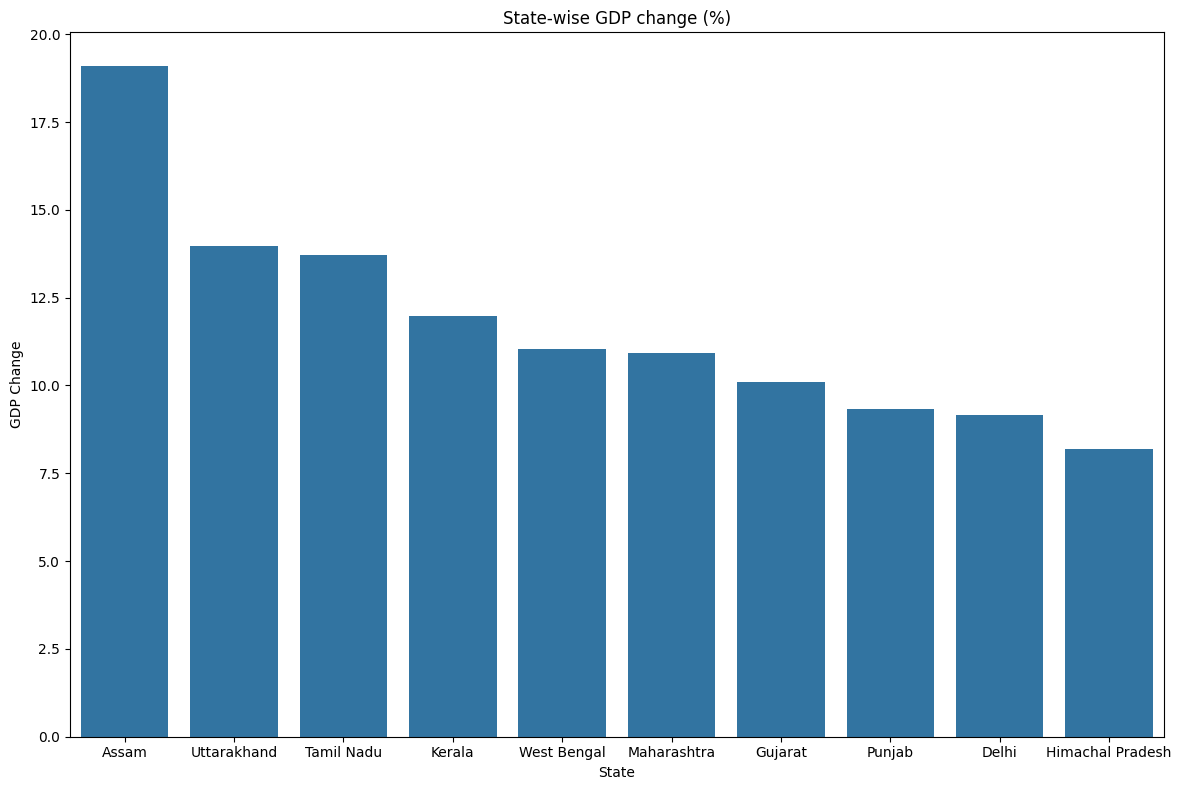

In [141]:
# GDP change by states

df_merged= df_merged.sort_values(by='GDP_Change', ascending=False)


plt.figure(figsize=(12,8))
sns.barplot(data=df_merged, x='State', y='GDP_Change')
plt.title('State-wise GDP change (%)')
plt.ylabel('GDP Change')
plt.xlabel('State')
plt.tight_layout()
plt.show()

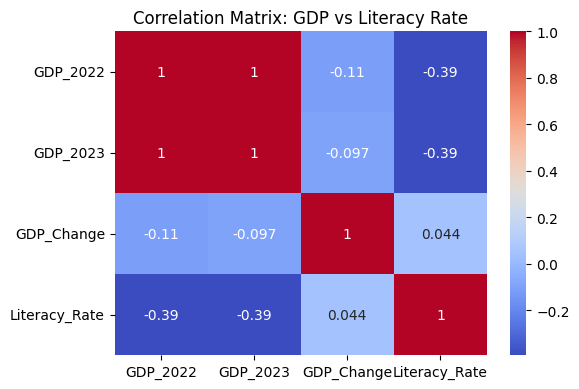

In [138]:
# GDP vS Literacy Rate

plt.figure(figsize=(6,4))
numeric_cols = ['GDP_2022', 'GDP_2023', 'GDP_Change', 'Literacy_Rate']
sns.heatmap(df_merged[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: GDP vs Literacy Rate')
plt.tight_layout()
plt.show()


In [135]:
#convert all DF into csv file

df_unicorns.to_csv("List_of_unicorn_startup_companies.csv", index=False)
df_gdp.to_csv("List_of_Indian_states_and_union_territories_by_GDP.csv",index=False)
df_literacy.to_csv("Literacy_in_India.csv",index=False)
df_internet.to_csv("Internet_in_India.csv",index=False)

df_merged.to_csv("Merged_Data.csv",index=False)
files.download('Merged_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
merged.to_csv("Merged_data.csv",index=False)
files.download('Merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insights :**


- Maharashtra is the economic powerhouse
of India with the highest GDP in 2023–24, contributing ₹40,443 Crore — significantly higher than any other state.

- Kerala has the highest literacy rate (93.91%), but it’s not in the top 3 richest states. This shows that being well-educated doesn't always mean making the most money.

- On average, states' economies grew by 11.75%, which means overall India saw good growth this year.

- The correlation between GDP and Literacy Rate is -0.39, indicating a weak negative relationship —A state can be rich but not highly educated, or the other way around..

- tates like Kerala and Himachal Pradesh don’t have very high GDP, but they have good literacy rates. This means they focus more on people’s education and well-being.

- Rich states usually have big cities and industries, while highly literate states have worked more on education and social progress.